In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data # Values are for each block (e.g. median household income within entire block)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Removing null data points

data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Creating training and testing splits

X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5364,-118.42,34.04,52.0,1358.0,272.0,574.0,267.0,5.6454,<1H OCEAN,500001.0
14018,-117.16,32.74,52.0,852.0,262.0,389.0,249.0,2.6042,NEAR OCEAN,225000.0
15074,-117.00,32.80,33.0,1816.0,325.0,768.0,316.0,4.5662,<1H OCEAN,150300.0
15845,-122.43,37.75,52.0,2155.0,468.0,962.0,490.0,3.7750,NEAR BAY,325900.0
7570,-118.21,33.89,42.0,1254.0,225.0,929.0,235.0,4.3646,<1H OCEAN,116200.0
...,...,...,...,...,...,...,...,...,...,...
17442,-120.46,34.66,5.0,2904.0,702.0,1302.0,618.0,3.0081,NEAR OCEAN,135200.0
18267,-122.07,37.36,21.0,3244.0,426.0,1158.0,415.0,7.5000,<1H OCEAN,500001.0
14115,-117.11,32.73,35.0,1689.0,397.0,1135.0,366.0,2.3269,NEAR OCEAN,97300.0
215,-122.22,37.79,38.0,3049.0,711.0,2167.0,659.0,2.7969,NEAR BAY,141700.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

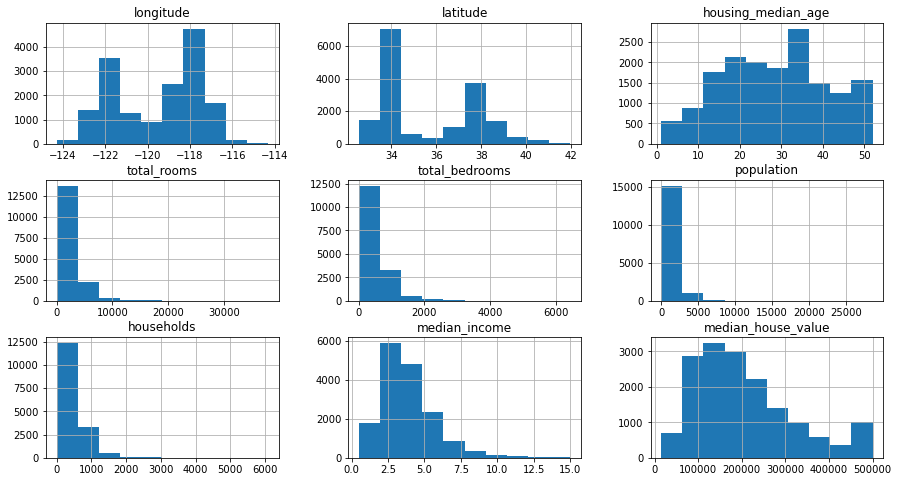

In [9]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

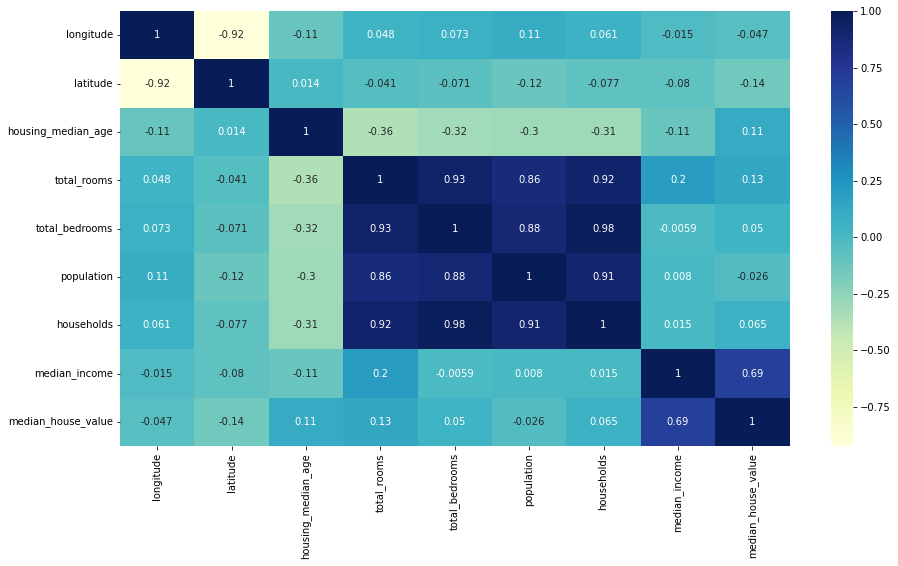

In [10]:
# Producing a correlation heatmap

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Data Processing

In [11]:
# Normalizing right-skewed columns

train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

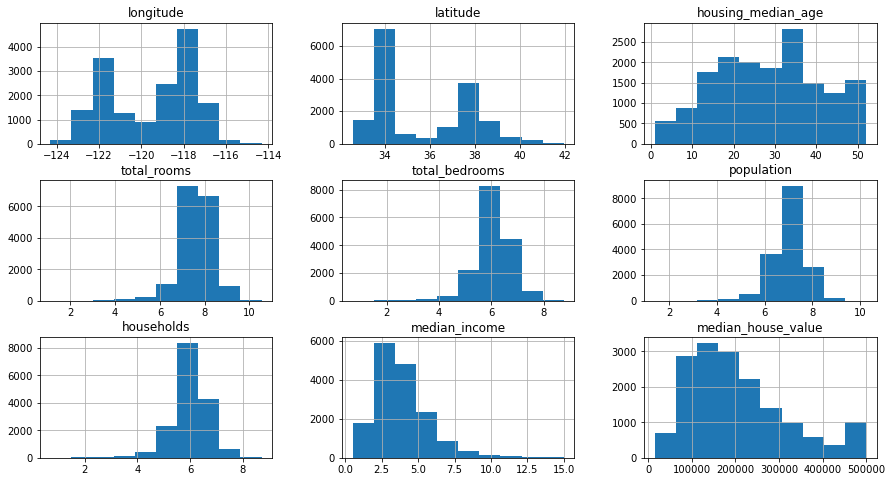

In [12]:
train_data.hist(figsize=(15, 8))

In [13]:
train_data["ocean_proximity"].value_counts()

<1H OCEAN     7209
INLAND        5222
NEAR OCEAN    2101
NEAR BAY      1811
ISLAND           3
Name: ocean_proximity, dtype: int64

In [14]:
# Applying one hot encoding to ocean_proximity

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5364,-118.42,34.04,52.0,7.214504,5.609472,6.354370,5.590987,5.6454,500001.0,1,0,0,0,0
14018,-117.16,32.74,52.0,6.748760,5.572154,5.966147,5.521461,2.6042,225000.0,0,0,0,0,1
15074,-117.00,32.80,33.0,7.504942,5.786897,6.645091,5.758902,4.5662,150300.0,1,0,0,0,0
15845,-122.43,37.75,52.0,7.676010,6.150603,6.870053,6.196444,3.7750,325900.0,0,0,0,1,0
7570,-118.21,33.89,42.0,7.134891,5.420535,6.835185,5.463832,4.3646,116200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,-120.46,34.66,5.0,7.974189,6.555357,7.172425,6.428105,3.0081,135200.0,0,0,0,0,1
18267,-122.07,37.36,21.0,8.084871,6.056784,7.055313,6.030685,7.5000,500001.0,1,0,0,0,0
14115,-117.11,32.73,35.0,7.432484,5.986452,7.035269,5.905362,2.3269,97300.0,0,0,0,0,1
215,-122.22,37.79,38.0,8.022897,6.568078,7.681560,6.492240,2.7969,141700.0,0,0,0,1,0


<AxesSubplot:>

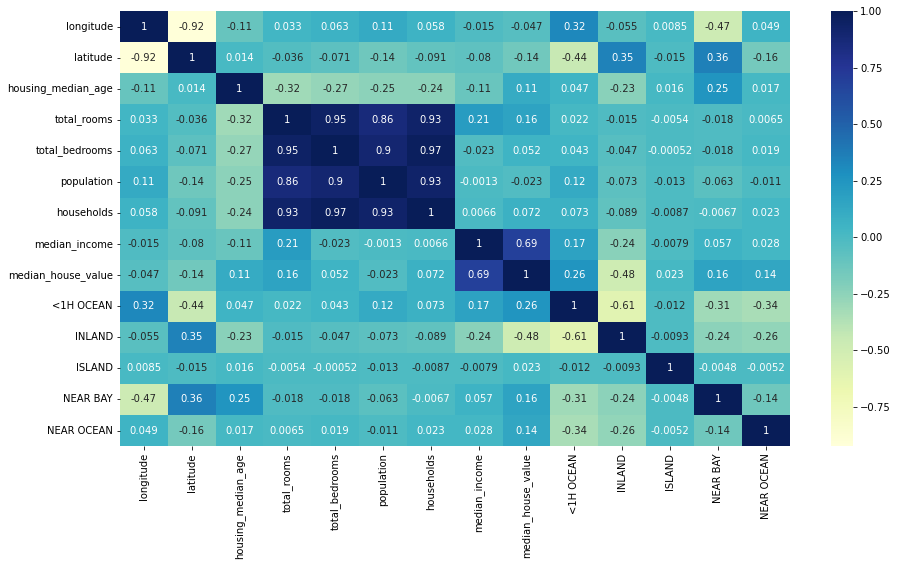

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

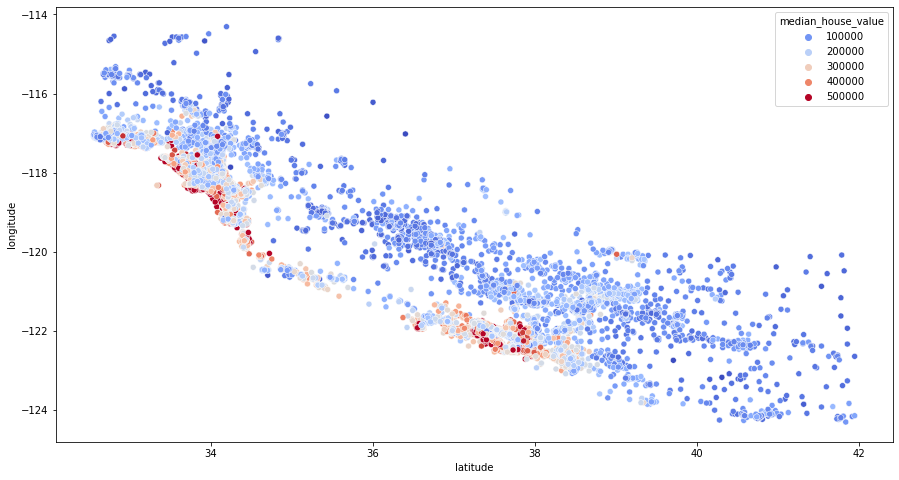

In [16]:
# Map of house prices using latitude and longitude

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

# Feature Engineering

In [17]:
# Introducing ratio of bedrooms to total rooms and the number of rooms per household as features

train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<AxesSubplot:>

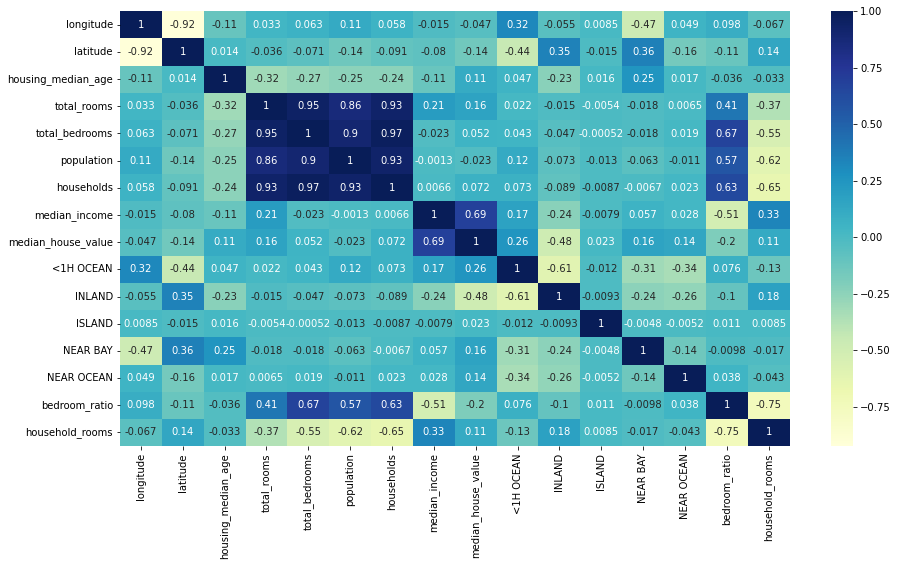

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Machine Learning

## Linear Regression

In [19]:
scaler = StandardScaler()

X_train = train_data.drop(["median_house_value"], axis=1)
y_train = train_data["median_house_value"]

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [20]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

X_test = test_data.drop(["median_house_value"], axis=1)
y_test = test_data["median_house_value"]

X_test_s = scaler.fit_transform(X_test)

In [21]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2820,-119.02,35.41,31.0,7.761745,6.553933,7.254178,6.416732,1.3222,51400.0,0,1,0,0,0,0.844389,1.209610
15018,-117.03,32.78,17.0,8.609225,7.389564,7.992269,7.338238,2.5707,171300.0,1,0,0,0,0,0.858331,1.173201
4912,-118.27,34.01,47.0,6.826545,5.579730,6.782192,5.402677,1.4327,114100.0,1,0,0,0,0,0.817358,1.263549
8763,-118.37,33.81,33.0,8.528726,6.673298,7.611842,6.618739,6.8553,482200.0,0,0,0,0,1,0.782450,1.288573
12871,-121.36,38.69,13.0,8.832150,7.244942,8.355145,7.259820,3.6989,93300.0,0,1,0,0,0,0.820292,1.216580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15532,-117.14,33.18,11.0,8.621013,6.882437,7.741099,6.878326,3.7109,199800.0,1,0,0,0,0,0.798333,1.253359
18014,-121.96,37.27,22.0,8.718500,7.100027,8.001020,7.059618,5.2533,269100.0,1,0,0,0,0,0.814363,1.234982
15505,-117.26,33.08,12.0,8.533263,6.703188,7.580189,6.575076,5.3905,299600.0,0,0,0,0,1,0.785536,1.297820
1566,-121.96,37.74,2.0,5.303305,3.044522,3.258097,2.302585,15.0001,350000.0,1,0,0,0,0,0.574080,2.303196


In [22]:
reg.score(X_test_s, y_test)

0.6641093580699252

# Random Forest

In [28]:
forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [29]:
forest.score(X_test_s, y_test)

0.8182942527501282

In [36]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
best_forest = grid_search.best_estimator_

In [38]:
best_forest.score(X_test_s, y_test)

0.8194370654013032